In [2]:
df['Category'].isna().sum()

NameError: name 'df' is not defined

In [ ]:
df['Category']= df['Category'].apply(lambda x:1 if x=='ham' else 0)
df

In [3]:
import pandas as pd
df= pd.read_csv("C:\\Users\\shram\\OneDrive\\Desktop\\spam.csv")
df.head(5)
emails = [
    'hello shraman',  'you have won $1000','how r u buddy?','DO you want $100 gift card?',"FLIP OUT THONGS - Limited time offer Right now, you can get your very own pair of FLIPOUT thongs with special 1 hour and 2-hour FLIP & THONG sessions. They are available in all sizes so grab a pair for the whole family",'Get 25% off your first reserved ride(excl. fees, max $25) We can’t give you an extra hour in bed, but a saving off your first Uber Reserve ride is the next best thing.Ride before 11:59pm AEST 5 May 2024 to save. T&Cs apply'
,'Hi Shraman Ratna Tuladhar,Please be advised the monthly statement for (2024/01) for your account (CAU0411810) is now available.Please log in to your Webull app → Account (Webull Icon Menu Item) → Documents → Statements to view your monthly statement.For any queries, please contact us through the Webull App: Menu → Help Center → Contact Us.Thank you for choosing Webull!Regards,Team Webull'
,'"Hi there! This is Prisma from SISTC Student Services. 😊 Hope you had a fantastic break during the summer semester! 🌞 Just a friendly reminder that self-enrollment for T1 2024 at SISTC has started, and we would love for you to enroll as soon as possible. The Australian Department of Home Affairs requires students to keep their providers updated about their current status and contact details. Could you please let us know your current status and your intention to study further? The deadline for this is 2:00pm 13/02/2024. Your prompt response is highly appreciated. Failure to respond may result in further action. Thank you!Please reply back to this message to confirm.'
]
df['Category']= df['Category'].apply(lambda x:1 if x=='ham' else 0)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt


model= MultinomialNB()
X_train,X_test,Y_train,Y_test= train_test_split(df.Message,df.Category,test_size=0.2)
clf= Pipeline([
     ('vectorizer', CountVectorizer()),
    ('m',MultinomialNB())
])
clf.fit(X_train,Y_train)
clf.predict(emails)


array([1, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [4]:
clf.score(X_test,Y_test)

0.9829596412556054

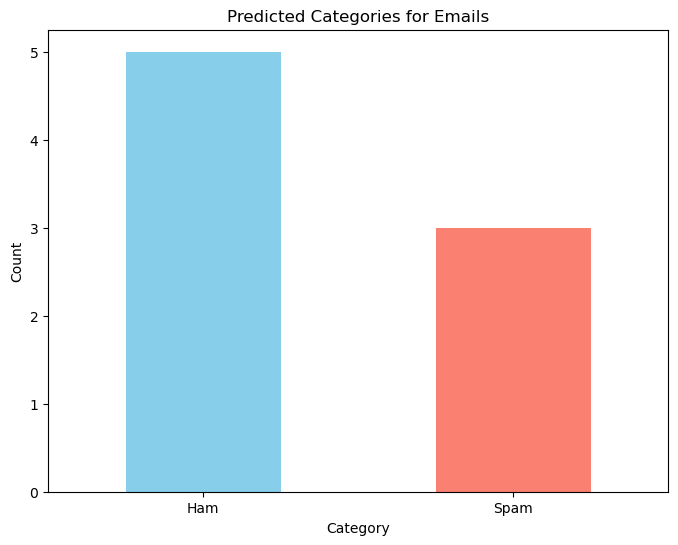

In [5]:

predictions = clf.predict(emails)

# Convert predictions to DataFrame for visualization
email_predictions_df = pd.DataFrame({'Email': emails, 'Predicted Category': predictions})

# Visualize the distribution of predicted categories
category_counts = email_predictions_df['Predicted Category'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Predicted Categories for Emails')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'], rotation=0)
plt.show()

In [6]:
clf.predict(X_test)

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [7]:
Y_test


801     0
5204    1
3463    0
2835    1
1323    1
       ..
2131    1
1203    1
3408    1
91      1
3188    1
Name: Category, Length: 1115, dtype: int64

In [11]:
import pickle
with open ("spam_detector.pickle",'wb')as f:
    pickle.dump(clf,f)
